In [1]:
import pandas as pd
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [14]:
df = pd.read_csv('data/train.tsv', sep='\t')

In [15]:
df.head()

,0,1,1.1,1.2,1.3,0.1,1.4,1.5,0.2,1.6,...,0.42,0.43,0.44,1.49,1.50,1.51,1.52,0.45,0.46,1.53
0,0,1,0,1,1,0,1,0,0,0,...,0,1,1,1,1,1,0,1,1,1
1,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
2,1,0,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,0,1,0
3,1,1,0,0,1,1,0,0,0,0,...,1,0,1,0,1,1,1,0,0,0
4,1,1,0,0,0,1,0,0,0,1,...,1,1,0,1,1,0,0,0,1,0


In [16]:
y = df['1.53'].values
df.drop('1.53', axis=1, inplace=True)

In [20]:
X_train, X_cv, y_train, y_cv = train_test_split(df.values, y, test_size=0.3, random_state=17)

In [21]:
tree_params = {'max_depth': range(1,30), 'min_samples_leaf': range(1,30)}

model = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
trainPredict = model.predict(X_train)
testPredict = model.predict(X_cv)

print("tree(train) accuracy =", accuracy_score(y_train, trainPredict))
print("tree(test) accuracy =", accuracy_score(y_cv, testPredict))
print(model.best_params_)

tree(train) accuracy = 0.954564937848264
tree(test) accuracy = 0.5503333333333333
{'max_depth': 23, 'min_samples_leaf': 2}


In [22]:
poly = PolynomialFeatures(2)
X_train_poly = X_train
X_cv_poly = X_cv

model = LogisticRegression()
model.fit(X_train_poly, y_train)
trainPredict = model.predict(X_train_poly)
testPredict = model.predict(X_cv_poly)

print("LogisticRegression(train) accuracy =", accuracy_score(y_train, trainPredict))
print("LogisticRegression(test) accuracy =", accuracy_score(y_cv, testPredict))

LogisticRegression(train) accuracy = 0.541363051864552
LogisticRegression(test) accuracy = 0.49566666666666664


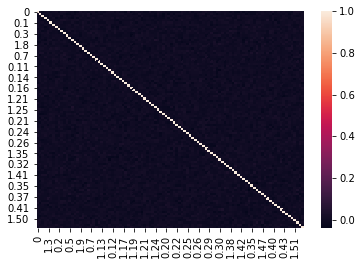

In [23]:
sns.heatmap(df.corr());